In [3]:
# to enable imports from parent package
import sys
import os
from pathlib import Path
parent_dir = Path(os. getcwd()).parent.absolute()
sys.path.append(str(parent_dir))

import pandas as pd
import numpy as np
import seaborn as sns
from datasets import get_dataset_split


train_split, valid_split, test_split = get_dataset_split("ZINC12k", root="../data")

some_graph = train_split[0]
num_atom_features = 1
num_bond_features = 1

atom_features = {
    "split": [],
    "id": [],
    "feat": [],
}
bond_features = {
    "split": [],
    "id": [],
    "feat": [],
}

splits = {
    "train": train_split,
    "valid": valid_split,
    "test": test_split,
}

num_nodes = []
num_edges = []
splits_per_graph = []

for split_name, split in splits.items():
    for graph in split:
        atom_features["split"].append(np.repeat(split_name, graph.num_nodes))
        atom_features["id"].append(np.repeat(graph.id, graph.num_nodes))
        atom_features["feat"].append(graph.x)
        
        bond_features["split"].append(np.repeat(split_name, graph.num_edges))
        bond_features["id"].append(np.repeat(graph.id, graph.num_edges))
        bond_features["feat"].append(graph.edge_attr)

        num_nodes.append(graph.num_nodes)
        num_edges.append(graph.num_edges)
    splits_per_graph.append(np.repeat(split_name, len(split)))

atom_features = {key: np.concatenate(val) for key, val in atom_features.items()}
bond_features = {key: np.concatenate(val) for key, val in bond_features.items()}

atom_features = pd.DataFrame(data=atom_features)
bond_features = pd.DataFrame(data=bond_features)

splits_per_graph = np.concatenate(splits_per_graph)
num_nodes = pd.DataFrame(data={"num_nodes": np.array(num_nodes), "split": splits_per_graph})
num_edges = pd.DataFrame(data={"num_edges": np.array(num_edges), "split": splits_per_graph})

In [15]:
graph_data = {
    "split": [],
    "id": [],
    "label": [],
    "num_nodes": [],
    "num_edges": [],
}

for split_name, split in splits.items():
    for graph in split:
        graph_data["split"].append(split_name)
        graph_data["id"].append(graph.id.item())
        graph_data["label"].append(graph.y.item())
        graph_data["num_nodes"].append(graph.num_nodes)
        assert graph.num_edges%2 == 0
        graph_data["num_edges"].append(int(graph.num_edges/2))

graph_data = {key: np.array(val) for key, val in graph_data.items()}
graph_data = pd.DataFrame(data=graph_data)
print(f"label {graph_data['label'].mean():.2f} (std {graph_data['label'].std():.2f})")
print(f"num_nodes {graph_data['num_nodes'].mean():.2f}")
print(f"num_edges {graph_data['num_edges'].mean():.2f}")
graph_data


label 0.02 (std 2.01)
num_nodes 23.16
num_edges 24.92


,split,id,label,num_nodes,num_edges
0,train,0,0.835036,29,32
1,train,1,-2.193549,26,28
2,train,2,1.842230,16,17
3,train,3,-0.711533,27,30
4,train,4,0.246347,21,22
...,...,...,...,...,...
11995,test,11995,0.133834,25,27
11996,test,11996,0.468727,25,26
11997,test,11997,1.338614,31,34
11998,test,11998,1.194243,19,20


<Axes: xlabel='num_nodes', ylabel='Count'>

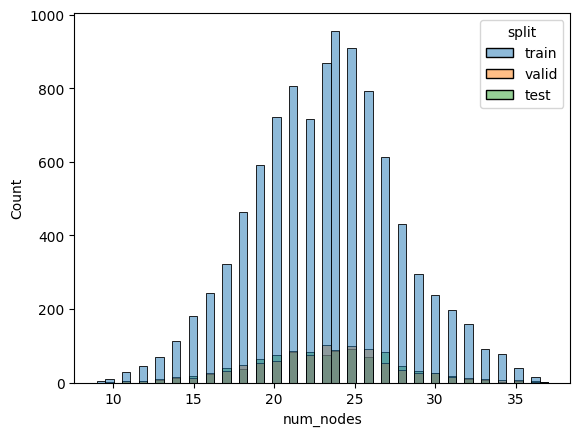

In [4]:
import seaborn as sns

# f = sum(n<=50 for n in num_nodes) / len(num_nodes)
sns.histplot(data=num_nodes, x="num_nodes", hue="split")#, f

In [2]:
total_atom_feat = len(atom_features)
count = atom_features["feat"].value_counts()
count = count[count>0]/total_atom_feat

frequent_atom_feat = list(count.keys())
coverage = sum(count.values)

count, coverage, frequent_atom_feat

(feat
 0     0.701210
 2     0.108686
 1     0.095612
 4     0.036298
 5     0.017649
 3     0.013474
 6     0.007273
 8     0.006867
 7     0.004110
 11    0.002929
 9     0.002145
 12    0.001958
 10    0.001173
 13    0.000338
 15    0.000151
 14    0.000090
 16    0.000022
 20    0.000004
 18    0.000004
 19    0.000004
 17    0.000004
 Name: count, dtype: float64,
 1.0,
 [0, 2, 1, 4, 5, 3, 6, 8, 7, 11, 9, 12, 10, 13, 15, 14, 16, 20, 18, 19, 17])

In [3]:
total_bond_feat = len(bond_features)
count = bond_features["feat"].value_counts()/total_bond_feat

cutoff = 0.001
frequent_bond_feat = list(count[count>cutoff].keys())
coverage = sum(count[count>cutoff].values)

count, coverage, frequent_bond_feat

(feat
 1    0.742944
 2    0.254417
 3    0.002639
 Name: count, dtype: float64,
 1.0,
 [1, 2, 3])